1. Linear Regression on the Boston Housing Dataset (Supervised Learning)

MAE: 0.5332001304956553
MSE: 0.5558915986952444


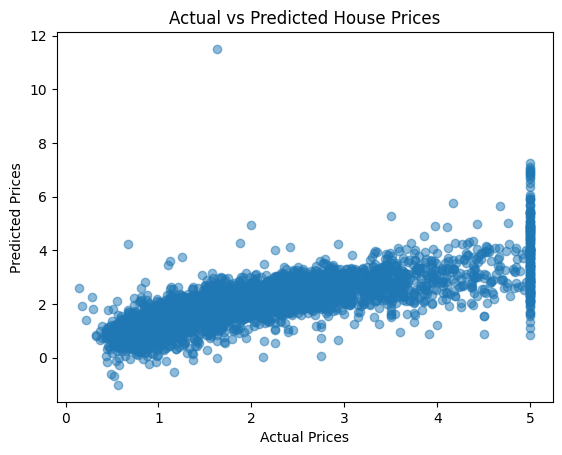

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing  # Alternative to Boston dataset

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Train-test split
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot Predictions vs. Actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


2. Image Classification with MNIST Dataset (Using SVM)

Accuracy: 0.9777777777777777


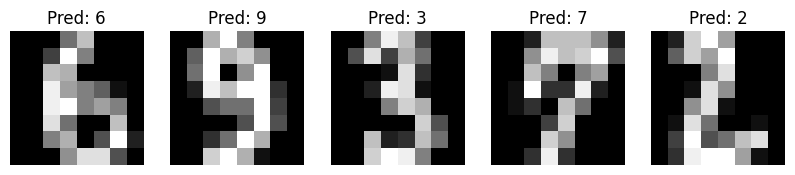

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load MNIST dataset
digits = datasets.load_digits()
X = digits.images.reshape(len(digits.images), -1)  # Flatten images
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display some test images with predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


3. Spam Email Classification (Using Naïve Bayes)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset
emails = [
    "Win a free iPhone now",
    "Limited-time offer, claim your reward",
    "Hey, how are you doing today?",
    "Let's catch up over lunch tomorrow",
    "You won a lottery, claim immediately!"
]
labels = [1, 1, 0, 0, 1]  # 1: Spam, 0: Not Spam

# Convert text to numerical vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Test on a new email
new_email = ["Congratulations! You have won a free trip"]
new_email_vector = vectorizer.transform(new_email)
print("Prediction (1=Spam, 0=Not Spam):", model.predict(new_email_vector)[0])


Accuracy: 1.0
Prediction (1=Spam, 0=Not Spam): 1


4. Customer Segmentation using K-Means Clustering (Unsupervised Learning)

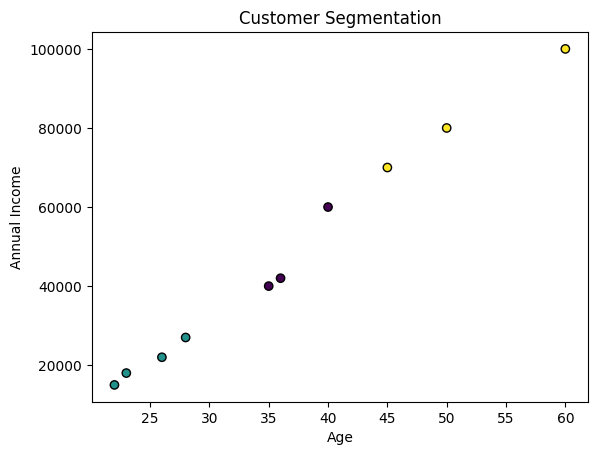

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample customer dataset
data = pd.DataFrame({
    'Age': [22, 35, 26, 40, 28, 50, 45, 36, 60, 23],
    'Annual_Income': [15000, 40000, 22000, 60000, 27000, 80000, 70000, 42000, 100000, 18000]
})

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Plot Clusters
plt.scatter(data['Age'], data['Annual_Income'], c=data['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Segmentation')
plt.show()


5. Anomaly Detection in Credit Card Transactions (Unsupervised Learning)

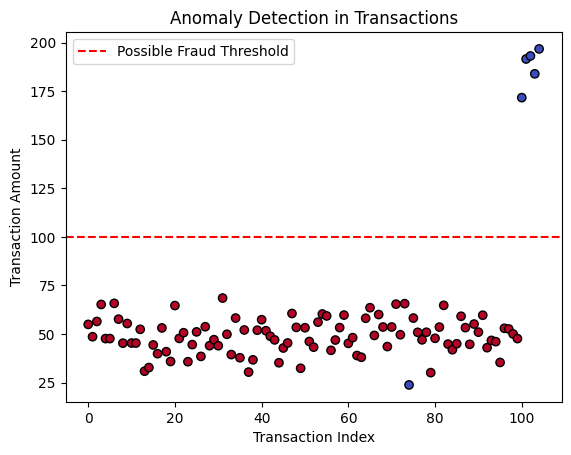

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Simulated dataset
np.random.seed(42)
transactions = np.concatenate([np.random.normal(50, 10, 100), np.random.normal(200, 20, 5)])  # Normal & fraud cases
df = pd.DataFrame({'Amount': transactions})

# Train Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = model.fit_predict(df[['Amount']])

# Plot anomalies
plt.scatter(df.index, df['Amount'], c=df['Anomaly'], cmap='coolwarm', edgecolors='k')
plt.axhline(y=100, color='r', linestyle='--', label="Possible Fraud Threshold")
plt.xlabel("Transaction Index")
plt.ylabel("Transaction Amount")
plt.title("Anomaly Detection in Transactions")
plt.legend()
plt.show()
